## IMPORTS

In [111]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Point,Polygon

## DATA preprocessing and dataframe

In [97]:
import geopandas as gpd
geodf= gpd.read_file('neighbourhoods.geojson')
geodf["area"] = geodf['geometry'].area/ 10**6
df = pd.read_csv('listings.csv')
mapping = dict(geodf[['neighbourhood', 'geometry']].values)
df['geometry'] = df.neighbourhood.map(mapping)
mapping = dict(geodf[['neighbourhood', 'area']].values)
df['area'] = df.neighbourhood.map(mapping)
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['room_type']= label_encoder.fit_transform(df['room_type'])
df = df.drop(['neighbourhood_group'],axis= 1)
geo = [Point(xy) for xy in zip( df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df,geometry = geo)


In [98]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry,area
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,2,65,2,182,2021-03-28,2.38,1,0,POINT (-87.58780 41.78790),4.538935e-10
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,South Lawndale,41.85373,-87.69540,0,113,2,395,2020-07-14,2.67,1,180,POINT (-87.69540 41.85373),1.288971e-09
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,0,65,2,394,2021-04-11,2.74,1,267,POINT (-87.68021 41.90166),1.285807e-09
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,Lincoln Park,41.91943,-87.63898,0,120,5,54,2021-01-15,0.63,11,1,POINT (-87.63898 41.91943),8.904995e-10
4,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.91196,-87.63981,0,175,4,22,2021-03-25,0.26,11,125,POINT (-87.63981 41.91196),8.904995e-10


In [90]:
geodf.head()

,neighbourhood,neighbourhood_group,geometry,area
0,Lincoln Square,None,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ...",7.200454e-10
1,Hyde Park,None,"MULTIPOLYGON (((-87.58038 41.80253, -87.58040 ...",4.538935e-10
2,Woodlawn,None,"MULTIPOLYGON (((-87.57715 41.78615, -87.57715 ...",5.816592e-10
3,Rogers Park,None,"MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ...",5.175543e-10
4,Jefferson Park,None,"MULTIPOLYGON (((-87.75263 41.96797, -87.75279 ...",6.546544e-10


In [91]:
gdf.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry,area
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,2,65,2,182,2021-03-28,2.38,1,0,POINT (-87.58780 41.78790),4.538935e-10
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,South Lawndale,41.85373,-87.69540,0,113,2,395,2020-07-14,2.67,1,180,POINT (-87.69540 41.85373),1.288971e-09
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,0,65,2,394,2021-04-11,2.74,1,267,POINT (-87.68021 41.90166),1.285807e-09
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,Lincoln Park,41.91943,-87.63898,0,120,5,54,2021-01-15,0.63,11,1,POINT (-87.63898 41.91943),8.904995e-10
4,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.91196,-87.63981,0,175,4,22,2021-03-25,0.26,11,125,POINT (-87.63981 41.91196),8.904995e-10


### A. Mapping the data listing and nighbourhood and top areas

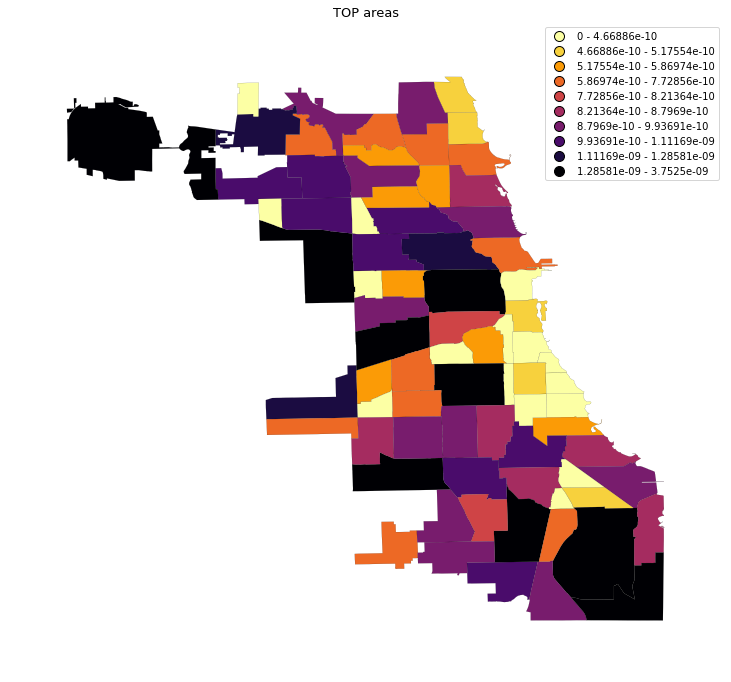

In [110]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(df['area'], k=10)

# Map
gplt.choropleth(geodf, 
    hue="area", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('TOP areas', fontsize=13);

### B. Thematic map for neighbourhood

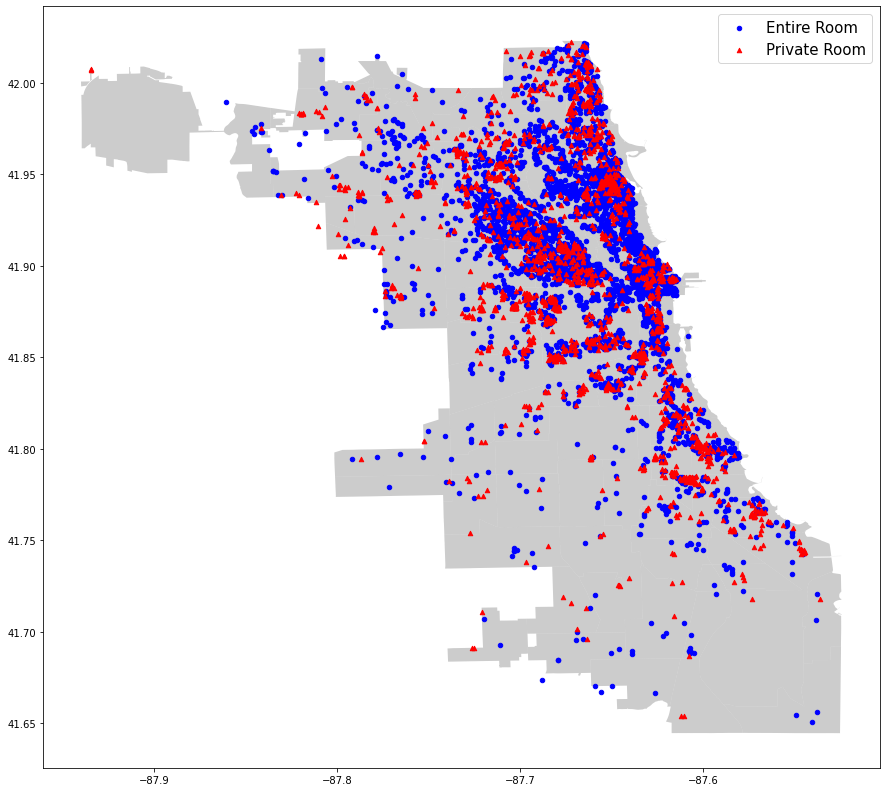

In [94]:
fig,ax = plt.subplots(figsize = (15,15))
geodf.plot(ax= ax ,alpha=0.4 ,color = 'grey')
gdf[gdf['room_type'] == 0].plot(ax =ax,markersize = 20, color = 'blue',marker = "o",label="Entire Room" )
gdf[gdf['room_type'] == 2].plot(ax=ax,markersize = 20, color = 'red',marker ="^",label = "Private Room")
plt.legend(prop ={'size':15})

### TOP 10 Hosts

In [104]:
frequency = df['neighbourhood'].value_counts()

In [115]:
freq = df['host_id'].value_counts()

In [116]:
print('top host id areas:')
print(freq[:10])

top host id areas:
107434423    233
3965428       79
47172572      68
12243051      53
170785489     51
9094538       43
359234447     36
63313003      34
49626033      31
33127842      29
Name: host_id, dtype: int64


In [109]:
print('top 10 areas:')
print(frequency[:10])

top 10 areas:
Near North Side    749
West Town          685
Lake View          583
Logan Square       377
Loop               358
Near West Side     353
Lincoln Park       289
Near South Side    181
Lower West Side    173
Uptown             170
Name: neighbourhood, dtype: int64
